## Ultimate Challenge

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
import pandas as pd

import numpy as np

import datetime




### Part 1

In [2]:
logins=pd.read_json("logins.json")

In [3]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [4]:
for i in range (93142):
    logins['holder']=1

In [5]:
logins['day_of_week'] = logins['login_time'].dt.day_name()

In [6]:
logins

,login_time,holder,day_of_week
0,1970-01-01 20:13:18,1,Thursday
1,1970-01-01 20:16:10,1,Thursday
2,1970-01-01 20:16:37,1,Thursday
3,1970-01-01 20:16:36,1,Thursday
4,1970-01-01 20:26:21,1,Thursday
...,...,...,...
93137,1970-04-13 18:50:19,1,Monday
93138,1970-04-13 18:43:56,1,Monday
93139,1970-04-13 18:54:02,1,Monday
93140,1970-04-13 18:57:38,1,Monday


In [7]:
resampled=logins.resample('15Min', on='login_time').agg({'holder':'sum'})

In [8]:
resampled

,holder
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [9]:
resampled.reset_index(inplace=True)

In [10]:
resampled['day_of_week'] = resampled['login_time'].dt.day_name()

In [11]:
resampled

,login_time,holder,day_of_week
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday
...,...,...,...
9783,1970-04-13 17:45:00,5,Monday
9784,1970-04-13 18:00:00,5,Monday
9785,1970-04-13 18:15:00,2,Monday
9786,1970-04-13 18:30:00,7,Monday


In [12]:
resampled['holder'].describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: holder, dtype: float64

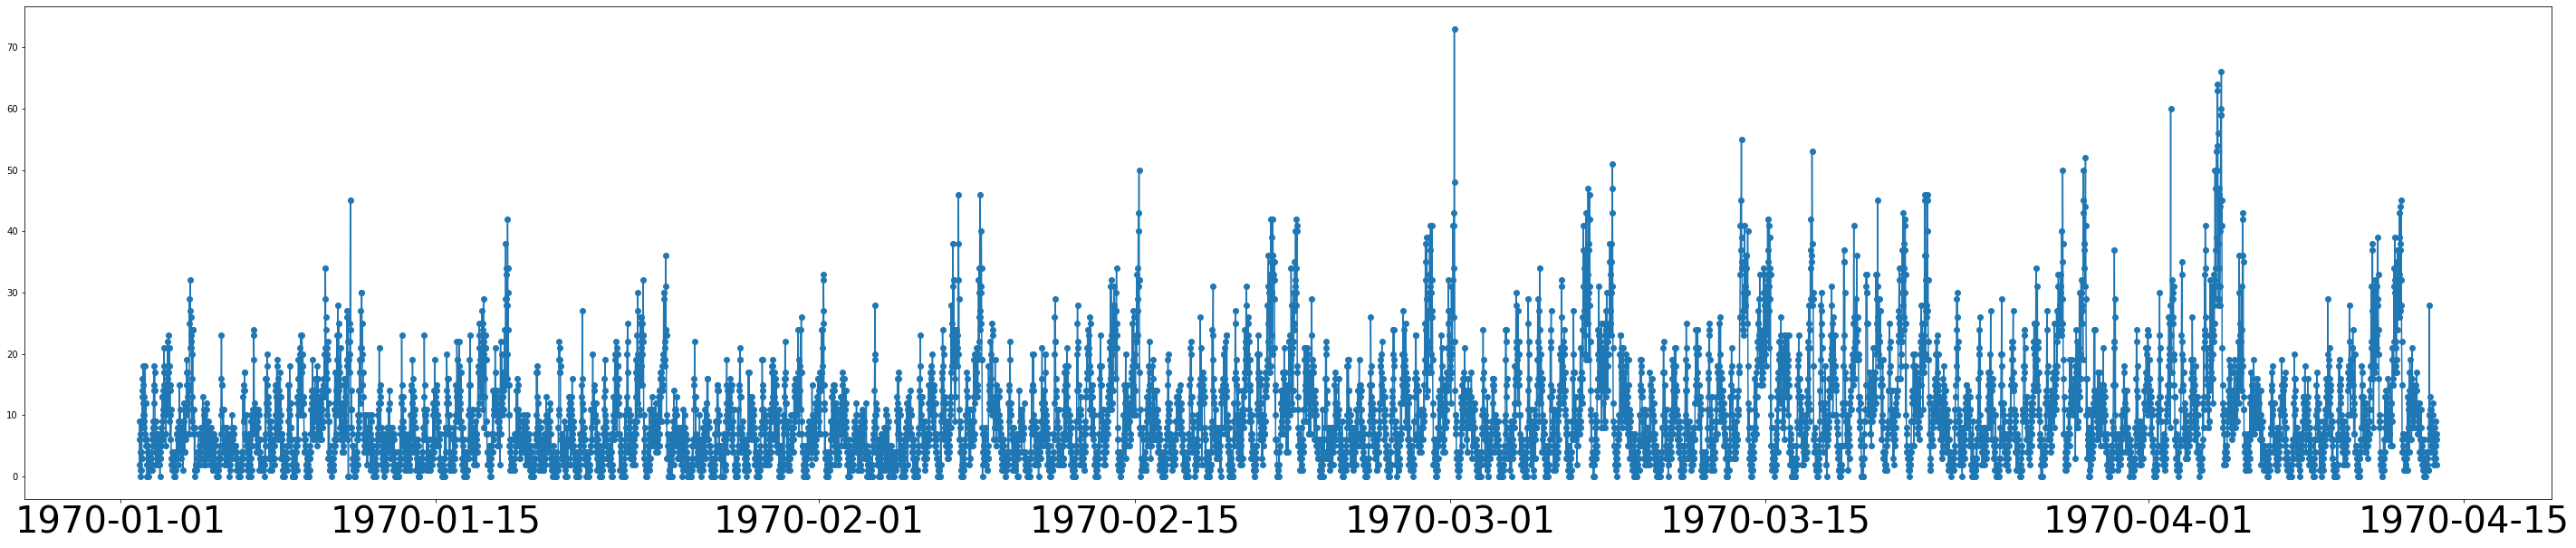

In [13]:
login_time = resampled['login_time']
count = resampled['holder']
plt.plot_date(login_time, count, linestyle='solid')
plt.gcf().set_size_inches(50, 10)
plt.tick_params(axis='x', which='major', labelsize=40)

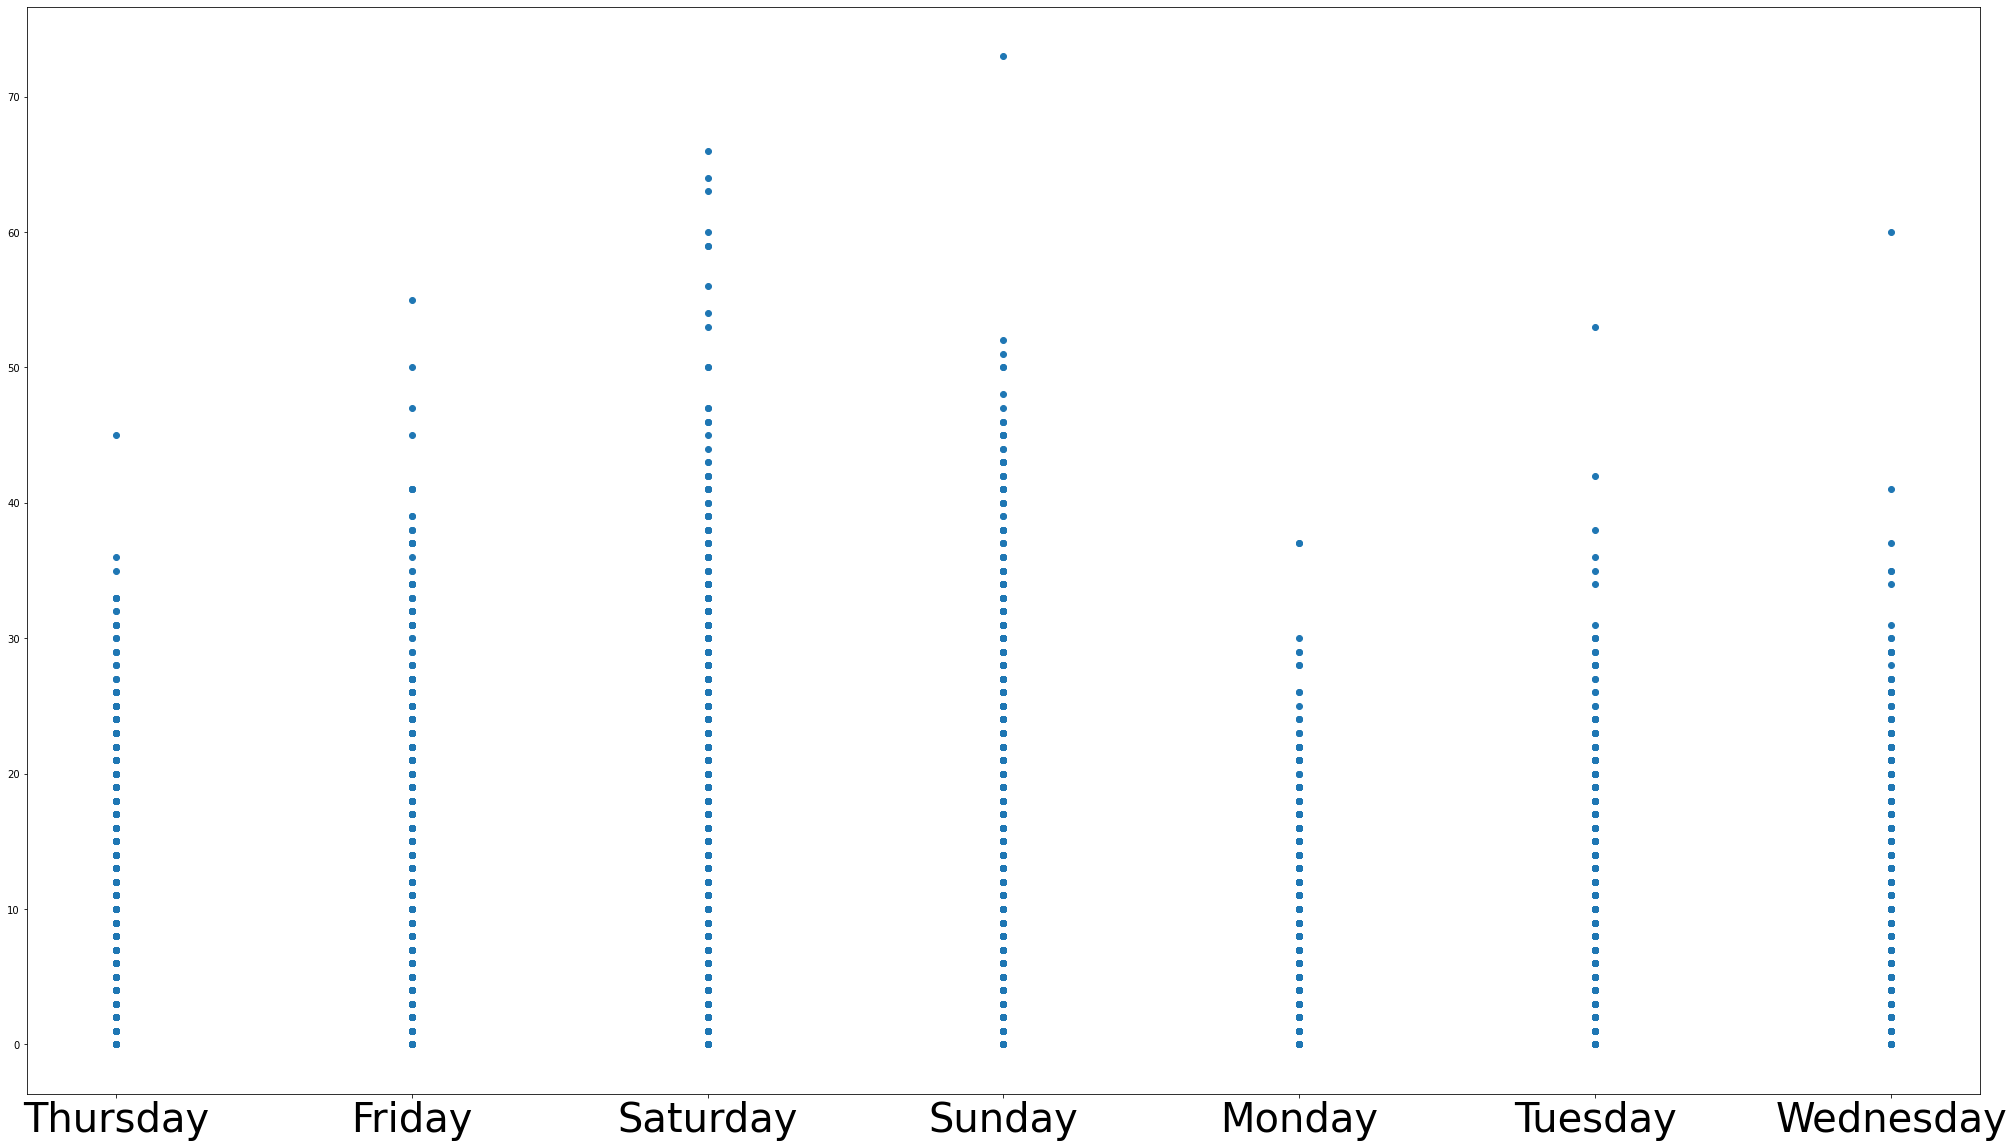

In [14]:
day = resampled['day_of_week']
count = resampled['holder']
plt.plot_date(day, count)
plt.gcf().set_size_inches(35, 20)
plt.tick_params(axis='x', which='major', labelsize=40)

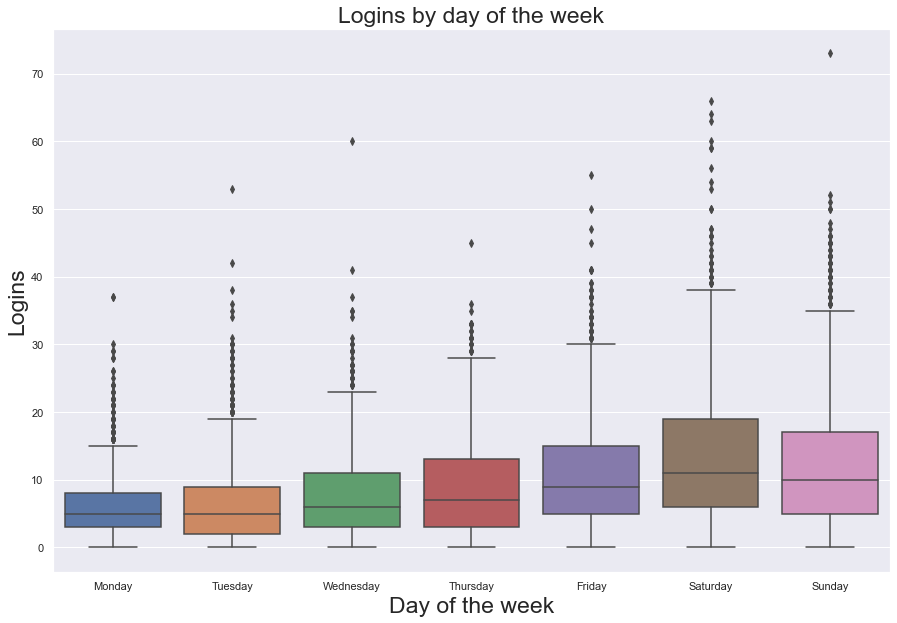

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.boxplot(x='day_of_week', y='holder', data=resampled, order=["Monday", "Tuesday", "Wednesday", 
                                                                "Thursday", "Friday", "Saturday", "Sunday"])

plt.gcf().set_size_inches(15, 10)
plt.title('Logins by day of the week', size=23)
plt.xlabel('Day of the week', size=23)
plt.ylabel('Logins', size=23)
plt.show()

## Time of day batching in quarters: First 6 hours of day, second 6 hours of day, third 6 hours of day, fourth 6 hours of day

In [16]:
six_hour=resampled.resample('360Min', on='login_time').agg({'holder':'sum'})

In [17]:
six_hour

,holder
login_time,
1970-01-01 18:00:00,112
1970-01-02 00:00:00,177
1970-01-02 06:00:00,114
1970-01-02 12:00:00,151
1970-01-02 18:00:00,239
...,...
1970-04-12 18:00:00,270
1970-04-13 00:00:00,109
1970-04-13 06:00:00,115


In [18]:
six_hour.reset_index(inplace=True)

In [19]:
six_hour

,login_time,holder
0,1970-01-01 18:00:00,112
1,1970-01-02 00:00:00,177
2,1970-01-02 06:00:00,114
3,1970-01-02 12:00:00,151
4,1970-01-02 18:00:00,239
...,...,...
404,1970-04-12 18:00:00,270
405,1970-04-13 00:00:00,109
406,1970-04-13 06:00:00,115
407,1970-04-13 12:00:00,151


In [20]:
six_hour['login_time'].unique

<bound method Series.unique of 0     1970-01-01 18:00:00
1     1970-01-02 00:00:00
2     1970-01-02 06:00:00
3     1970-01-02 12:00:00
4     1970-01-02 18:00:00
              ...        
404   1970-04-12 18:00:00
405   1970-04-13 00:00:00
406   1970-04-13 06:00:00
407   1970-04-13 12:00:00
408   1970-04-13 18:00:00
Name: login_time, Length: 409, dtype: datetime64[ns]>

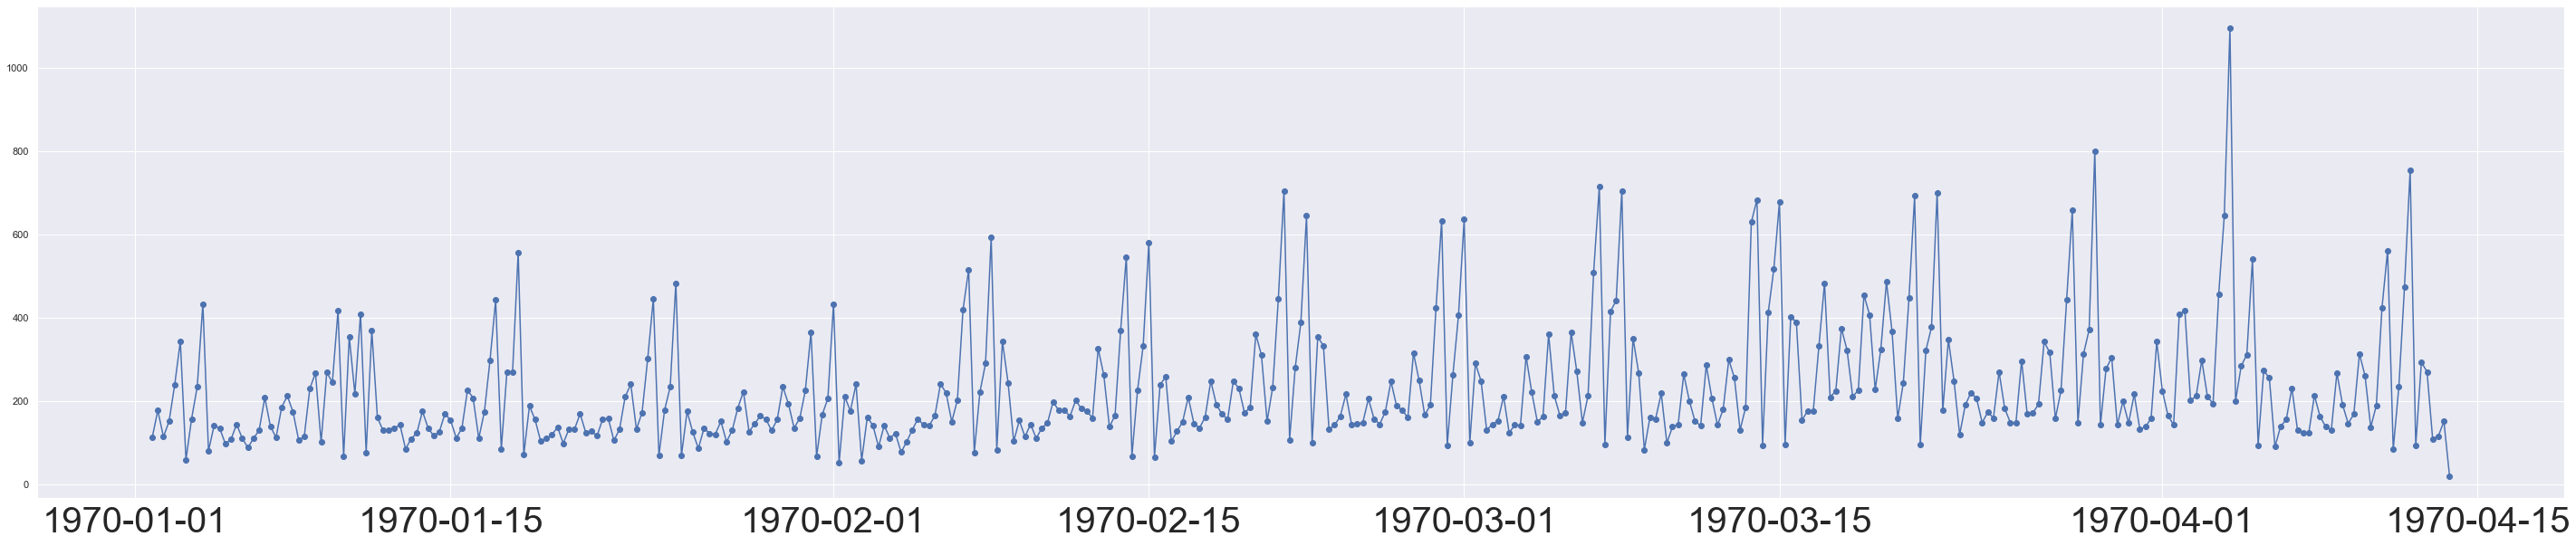

In [21]:
login_time = six_hour['login_time']
count = six_hour['holder']
plt.plot_date(login_time, count, linestyle='solid')
plt.gcf().set_size_inches(50, 10)
plt.tick_params(axis='x', which='major', labelsize=40)

In [22]:
six_hour['datehour'] = six_hour['login_time'].dt.hour

In [23]:
six_hour

,login_time,holder,datehour
0,1970-01-01 18:00:00,112,18
1,1970-01-02 00:00:00,177,0
2,1970-01-02 06:00:00,114,6
3,1970-01-02 12:00:00,151,12
4,1970-01-02 18:00:00,239,18
...,...,...,...
404,1970-04-12 18:00:00,270,18
405,1970-04-13 00:00:00,109,0
406,1970-04-13 06:00:00,115,6
407,1970-04-13 12:00:00,151,12


In [24]:
six_hour.dtypes

login_time    datetime64[ns]
holder                 int64
datehour               int64
dtype: object

In [27]:
six_hour['time_of_day'] = pd.cut(x=six_hour['datehour'], bins=[-1, 5, 11, 17, 24], labels=['first six hrs','second six hrs', 'third six hrs', 'fourth six hrs'])

In [28]:
six_hour

,login_time,holder,datehour,time_of_day
0,1970-01-01 18:00:00,112,18,fourth six hrs
1,1970-01-02 00:00:00,177,0,first six hrs
2,1970-01-02 06:00:00,114,6,second six hrs
3,1970-01-02 12:00:00,151,12,third six hrs
4,1970-01-02 18:00:00,239,18,fourth six hrs
...,...,...,...,...
404,1970-04-12 18:00:00,270,18,fourth six hrs
405,1970-04-13 00:00:00,109,0,first six hrs
406,1970-04-13 06:00:00,115,6,second six hrs
407,1970-04-13 12:00:00,151,12,third six hrs


In [32]:
six_hour

,login_time,holder,datehour,time_of_day
0,1970-01-01 18:00:00,112,18,fourth six hrs
1,1970-01-02 00:00:00,177,0,first six hrs
2,1970-01-02 06:00:00,114,6,second six hrs
3,1970-01-02 12:00:00,151,12,third six hrs
4,1970-01-02 18:00:00,239,18,fourth six hrs
...,...,...,...,...
404,1970-04-12 18:00:00,270,18,fourth six hrs
405,1970-04-13 00:00:00,109,0,first six hrs
406,1970-04-13 06:00:00,115,6,second six hrs
407,1970-04-13 12:00:00,151,12,third six hrs


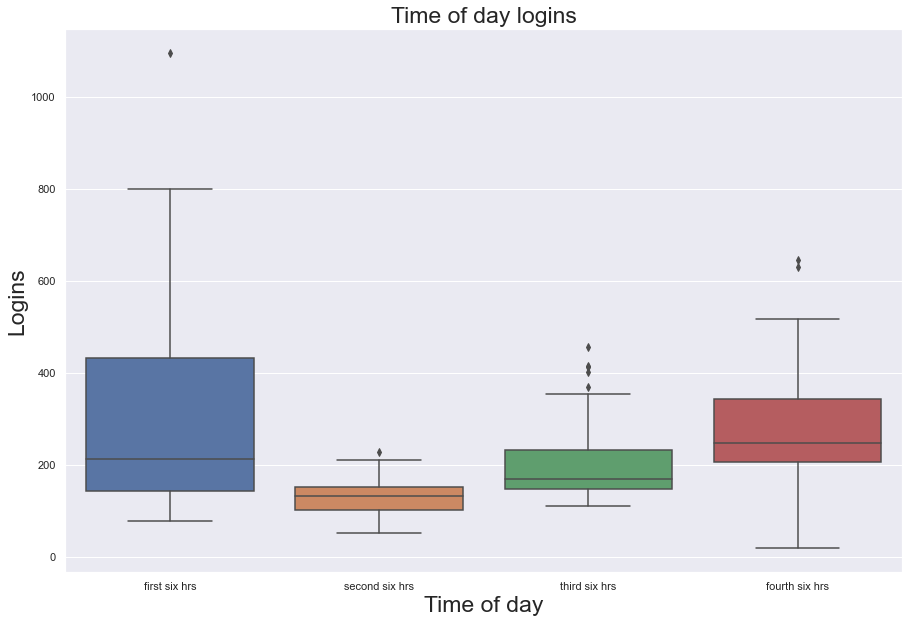

In [33]:
sns.set(style="darkgrid")


sns.boxplot(x='time_of_day', y='holder', data=six_hour)

plt.gcf().set_size_inches(15, 10)
plt.title('Time of day logins', size=23)
plt.xlabel('Time of day', size=23)
plt.ylabel('Logins', size=23)
plt.show()

### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Record all drivers passing through tolls and see how much of a increased frequency there is.

### Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:


a) how you will implement the experiment



#### Have clearly defined dates for when the change was implemented.

b) what statistical test(s) you will conduct to verify the significance of the observation


#### Percent change 

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

#### If there was a significant percentage increase, then the proposed solution should remain in effect.  It will necessary to have target values for what the frequency of travelers should be to compensate for lost toll revenue.

# Part 3

In [34]:
logins_challenge=pd.read_json("ultimate_data_challenge.json")

In [35]:
logins_challenge

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [36]:
logins_challenge.dtypes


city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [37]:
logins_challenge['signup_date'] = pd.to_datetime(logins_challenge['signup_date'])
logins_challenge['last_trip_date'] = pd.to_datetime(logins_challenge['last_trip_date'])

In [38]:
logins_challenge['time_between'] = logins_challenge['last_trip_date']-logins_challenge['signup_date']

In [39]:
logins_challenge['time_between'] = logins_challenge['time_between']/ np.timedelta64(1, 'D')

In [40]:
logins_challenge['signup_date'].describe()

<ipython-input-40-718727262d91>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins_challenge['signup_date'].describe()


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [41]:
logins_challenge['last_trip_date'].describe()

<ipython-input-41-ae97b8ba0b3f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins_challenge['last_trip_date'].describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

### Let's add a column defined as: still using 5 months after signup yes or no?

### column name: min 5 months

In [42]:
logins_challenge['min_5_months']=np.where(logins_challenge['time_between']>=150, 1,0)
#logins_challenge['min_4_months']=np.where(logins_challenge['time_between']>=120, 1,0)
#logins_challenge['min_3_months']=np.where(logins_challenge['time_between']>=90, 1,0)
#logins_challenge['min_2_months']=np.where(logins_challenge['time_between']>=60, 1,0)
#logins_challenge['min_1_months']=np.where(logins_challenge['time_between']>=30, 1,0)




In [43]:
logins_challenge['time_between'].describe()

count    50000.000000
mean        92.790100
std         62.129822
min          0.000000
25%         27.000000
50%        110.000000
75%        150.000000
max        181.000000
Name: time_between, dtype: float64

In [44]:
logins_challenge.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
time_between                     float64
min_5_months                       int64
dtype: object

In [45]:
logins_challenge

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_between,min_5_months
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131.0,0
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1.0,0


In [46]:
logins_challenge=logins_challenge.drop('signup_date', axis=1) 

In [47]:
logins_challenge=logins_challenge.drop('last_trip_date', axis=1) 

In [48]:
logins_challenge=logins_challenge.drop('time_between', axis=1) 

In [49]:
logins_challenge

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,NaN,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


In [50]:
logins_challenge['min_5_months'].describe()

count    50000.00000
mean         0.25428
std          0.43546
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: min_5_months, dtype: float64

### Cleaning checklist

categorical encoder for city, phone, ultimate_black_user.

check for nan values


#### Nan values

In [51]:
logins_challenge['avg_rating_of_driver'].isnull().sum()

8122

In [52]:
logins_challenge['avg_surge'].isnull().sum()

0

In [53]:
logins_challenge['weekday_pct'].isnull().sum()

0

In [54]:
logins_challenge['avg_rating_by_driver'].isnull().sum()

201

In [55]:
logins_challenge['avg_rating_of_driver'].fillna(logins_challenge['avg_rating_of_driver'].median(), inplace=True)

In [56]:
logins_challenge

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,4.9,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


In [57]:
logins_challenge['avg_rating_of_driver'].isnull().sum()

0

In [58]:
logins_challenge['avg_rating_by_driver'].fillna(logins_challenge['avg_rating_by_driver'].median(), inplace=True)

In [59]:
logins_challenge['avg_rating_by_driver'].isnull().sum()

0

In [60]:
logins_challenge.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
min_5_months                int64
dtype: object

In [61]:
logins_challenge

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,4.9,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


In [62]:
import category_encoders as ce

In [63]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [64]:
y=logins_challenge['min_5_months']

In [65]:
X=logins_challenge.drop('min_5_months', axis='columns')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [67]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (40000, 10) (40000,)
Test (10000, 10) (10000,)


In [68]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [69]:
print(X_train_enc)

       city_Astapor  city_Winterfell  city_King's Landing  \
18165             1                0                    0   
36059             0                1                    0   
13242             0                1                    0   
32985             0                1                    0   
41133             0                1                    0   
...             ...              ...                  ...   
43723             0                1                    0   
32511             1                0                    0   
5192              0                1                    0   
12172             1                0                    0   
33003             0                1                    0   

       trips_in_first_30_days  avg_rating_of_driver  avg_surge  phone_iPhone  \
18165                       6                   4.7       1.00             1   
36059                       2                   4.5       1.00             1   
13242                      

In [70]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [71]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [72]:
X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26247 to 43070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_Astapor            10000 non-null  int64  
 1   city_Winterfell         10000 non-null  int64  
 2   city_King's Landing     10000 non-null  int64  
 3   trips_in_first_30_days  10000 non-null  int64  
 4   avg_rating_of_driver    10000 non-null  float64
 5   avg_surge               10000 non-null  float64
 6   phone_iPhone            10000 non-null  int64  
 7   phone_Android           10000 non-null  int64  
 8   phone_nan               10000 non-null  int64  
 9   surge_pct               10000 non-null  float64
 10  ultimate_black_user     10000 non-null  bool   
 11  weekday_pct             10000 non-null  float64
 12  avg_dist                10000 non-null  float64
 13  avg_rating_by_driver    10000 non-null  float64
dtypes: bool(1), float64(6), int64(7)
m

In [73]:
predictions=logmodel.predict(X_test_enc)

In [74]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.95      0.85      7399\n           1       0.60      0.20      0.30      2601\n\n    accuracy                           0.76     10000\n   macro avg       0.68      0.58      0.58     10000\nweighted avg       0.73      0.76      0.71     10000\n'

In [77]:
confusion_matrix(y_test,predictions)

array([[7044,  355],
       [2078,  523]])

In [78]:
accuracy_score(y_test,predictions)

0.7567

In [79]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [80]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,predictions)))

The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.5956719817767654
The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.20107650903498656


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [82]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth= 8, random_state=42)

In [83]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

In [84]:
predictions=RF_model.predict(X_test_enc)

In [85]:
X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26247 to 43070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_Astapor            10000 non-null  int64  
 1   city_Winterfell         10000 non-null  int64  
 2   city_King's Landing     10000 non-null  int64  
 3   trips_in_first_30_days  10000 non-null  int64  
 4   avg_rating_of_driver    10000 non-null  float64
 5   avg_surge               10000 non-null  float64
 6   phone_iPhone            10000 non-null  int64  
 7   phone_Android           10000 non-null  int64  
 8   phone_nan               10000 non-null  int64  
 9   surge_pct               10000 non-null  float64
 10  ultimate_black_user     10000 non-null  bool   
 11  weekday_pct             10000 non-null  float64
 12  avg_dist                10000 non-null  float64
 13  avg_rating_by_driver    10000 non-null  float64
dtypes: bool(1), float64(6), int64(7)
m

In [86]:
importances = RF_model.feature_importances_

In [87]:
X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 26247 to 43070
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_Astapor            10000 non-null  int64  
 1   city_Winterfell         10000 non-null  int64  
 2   city_King's Landing     10000 non-null  int64  
 3   trips_in_first_30_days  10000 non-null  int64  
 4   avg_rating_of_driver    10000 non-null  float64
 5   avg_surge               10000 non-null  float64
 6   phone_iPhone            10000 non-null  int64  
 7   phone_Android           10000 non-null  int64  
 8   phone_nan               10000 non-null  int64  
 9   surge_pct               10000 non-null  float64
 10  ultimate_black_user     10000 non-null  bool   
 11  weekday_pct             10000 non-null  float64
 12  avg_dist                10000 non-null  float64
 13  avg_rating_by_driver    10000 non-null  float64
dtypes: bool(1), float64(6), int64(7)
m

In [88]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.93      0.87      7399\n           1       0.67      0.38      0.49      2601\n\n    accuracy                           0.79     10000\n   macro avg       0.74      0.66      0.68     10000\nweighted avg       0.77      0.79      0.77     10000\n'

In [89]:
confusion_matrix(y_test,predictions)

array([[6909,  490],
       [1604,  997]])

In [90]:
accuracy_score(y_test,predictions)

0.7906

In [91]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,predictions)))



The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.6704774714189644
The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.3833141099577086


In [92]:
importances = RF_model.feature_importances_

In [93]:
RF_model.feature_importances_

array([0.02750391, 0.01061727, 0.08170954, 0.06058596, 0.03386242,
       0.12285963, 0.04787453, 0.041751  , 0.        , 0.18799198,
       0.04524001, 0.12260642, 0.03096872, 0.18642861])

<AxesSubplot:>

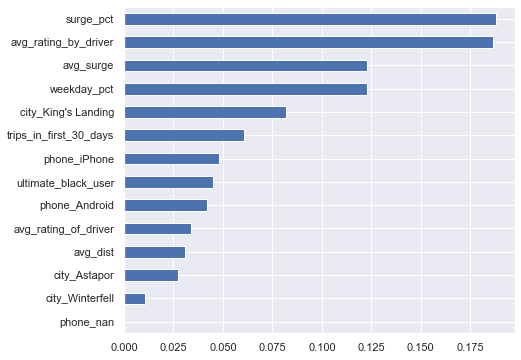

In [94]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [95]:
from sklearn.inspection import plot_partial_dependence

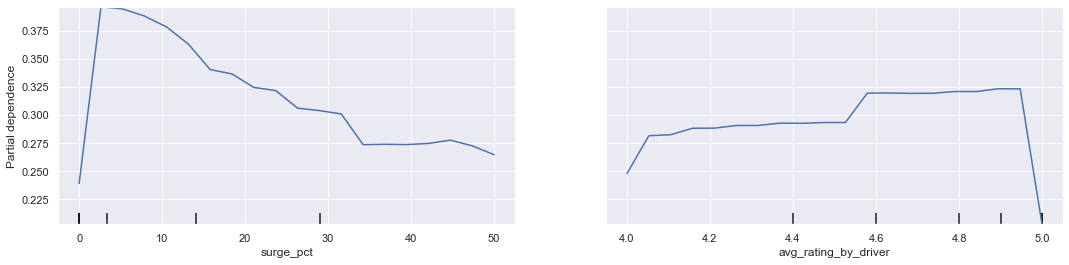

In [97]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['surge_pct', "avg_rating_by_driver"], 
                        grid_resolution=20, ax=ax)

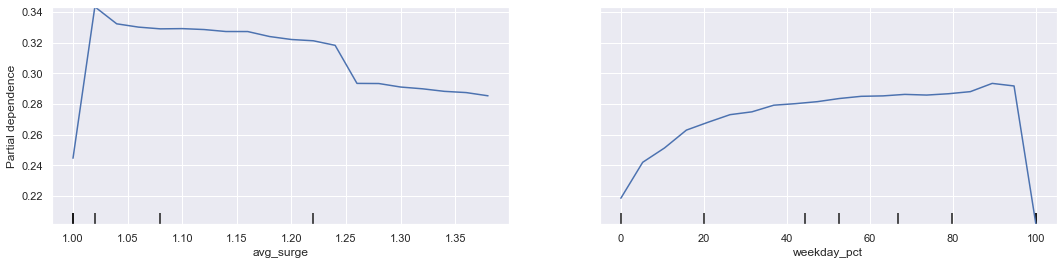

In [98]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['avg_surge', "weekday_pct"], 
                        grid_resolution=20, ax=ax)

## Exploratory Analysis

In [100]:
logins_challenge

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0
49996,Astapor,1,4.9,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


In [101]:
logins_challenge["6monthsYN"]= np.where(logins_challenge["min_5_months"]==1, "Yes", "No")

In [102]:
logins_challenge

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months,6monthsYN
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0,No
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,No
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,No
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,Yes
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0,No
49996,Astapor,1,4.9,1.00,iPhone,0.0,False,0.0,0.00,4.0,0,No
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0,No
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0,No


Text(0.5, 1.0, 'Phone type and Retention')

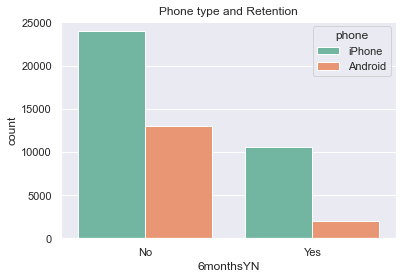

In [103]:
sns.countplot(x="6monthsYN", hue="phone", data=logins_challenge, palette="Set2").set_title("Phone type and Retention")

## Not great retention for Android users

Text(0.5, 1.0, 'Ultimate Black User and Retention')

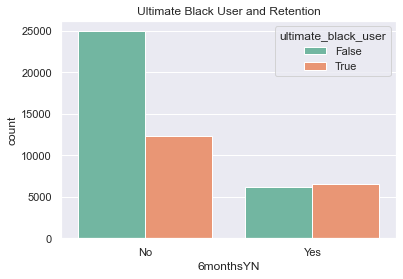

In [104]:
sns.countplot(x="6monthsYN", hue="ultimate_black_user", data=logins_challenge, palette="Set2").set_title("Ultimate Black User and Retention")

Text(0.5, 1.0, 'City and Retention')

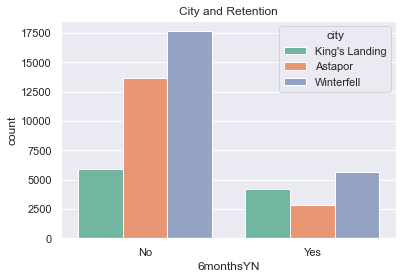

In [105]:
sns.countplot(x="6monthsYN", hue="city", data=logins_challenge, palette="Set2").set_title("City and Retention")

## Split the data into seperate data frames: One for retention and the other for no retention

In [106]:
YES=logins_challenge[logins_challenge['min_5_months']==1]

In [108]:
NO=logins_challenge[logins_challenge['min_5_months']==0]

In [109]:
YES

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months,6monthsYN
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,Yes
16,King's Landing,1,5.0,1.00,Android,0.0,True,50.0,10.86,3.0,1,Yes
17,King's Landing,0,3.9,1.00,iPhone,0.0,True,95.2,2.38,4.8,1,Yes
19,King's Landing,0,5.0,1.17,iPhone,33.3,False,66.7,12.08,5.0,1,Yes
32,Winterfell,1,4.0,2.00,iPhone,100.0,False,100.0,10.01,5.0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49973,Astapor,2,4.0,1.00,iPhone,0.0,True,25.0,4.07,5.0,1,Yes
49975,Winterfell,11,3.9,1.03,iPhone,4.1,False,91.8,2.18,4.8,1,Yes
49976,King's Landing,0,2.0,1.00,iPhone,0.0,False,100.0,2.39,4.0,1,Yes
49991,Winterfell,0,5.0,1.25,iPhone,100.0,False,0.0,1.06,5.0,1,Yes


In [121]:
YES.info

<bound method DataFrame.info of                  city  trips_in_first_30_days  avg_rating_of_driver  \
3      King's Landing                       9                   4.6   
16     King's Landing                       1                   5.0   
17     King's Landing                       0                   3.9   
19     King's Landing                       0                   5.0   
32         Winterfell                       1                   4.0   
...               ...                     ...                   ...   
49973         Astapor                       2                   4.0   
49975      Winterfell                      11                   3.9   
49976  King's Landing                       0                   2.0   
49991      Winterfell                       0                   5.0   
49993         Astapor                       3                   4.8   

       avg_surge    phone  surge_pct  ultimate_black_user  weekday_pct  \
3           1.14   iPhone       20.0     

In [110]:
NO

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,min_5_months,6monthsYN
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,0,No
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,No
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,No
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,No
5,Winterfell,2,3.5,1.00,iPhone,0.0,True,100.0,10.56,5.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,0,No
49996,Astapor,1,4.9,1.00,iPhone,0.0,False,0.0,0.00,4.0,0,No
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0,No
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0,No


In [122]:
NO.info

<bound method DataFrame.info of                  city  trips_in_first_30_days  avg_rating_of_driver  \
0      King's Landing                       4                   4.7   
1             Astapor                       0                   5.0   
2             Astapor                       3                   4.3   
4          Winterfell                      14                   4.4   
5          Winterfell                       2                   3.5   
...               ...                     ...                   ...   
49995  King's Landing                       0                   5.0   
49996         Astapor                       1                   4.9   
49997      Winterfell                       0                   5.0   
49998         Astapor                       2                   3.0   
49999         Astapor                       0                   4.9   

       avg_surge    phone  surge_pct  ultimate_black_user  weekday_pct  \
0           1.10   iPhone       15.4     

In [117]:
NO["trips_in_first_30_days"].describe()

count    37286.000000
mean         1.813093
std          2.915448
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         73.000000
Name: trips_in_first_30_days, dtype: float64

In [118]:
YES["trips_in_first_30_days"].describe()

count    12714.000000
mean         3.642205
std          5.398983
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

No handles with labels found to put in legend.
No handles with labels found to put in legend.


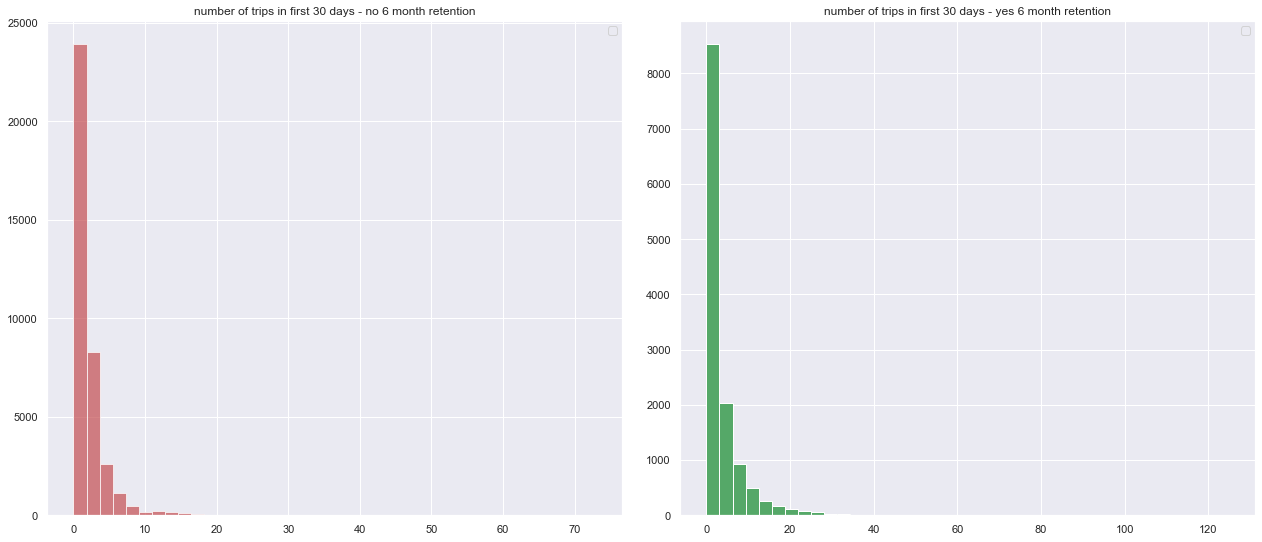

In [116]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["trips_in_first_30_days"], bins=40, alpha = 0.7, color = 'r')
#ax[0].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
ax[0].title.set_text('number of trips in first 30 days - no 6 month retention')
ax[1].title.set_text('number of trips in first 30 days - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["trips_in_first_30_days"], bins=40, alpha = 1, color = 'g')
#ax[1].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


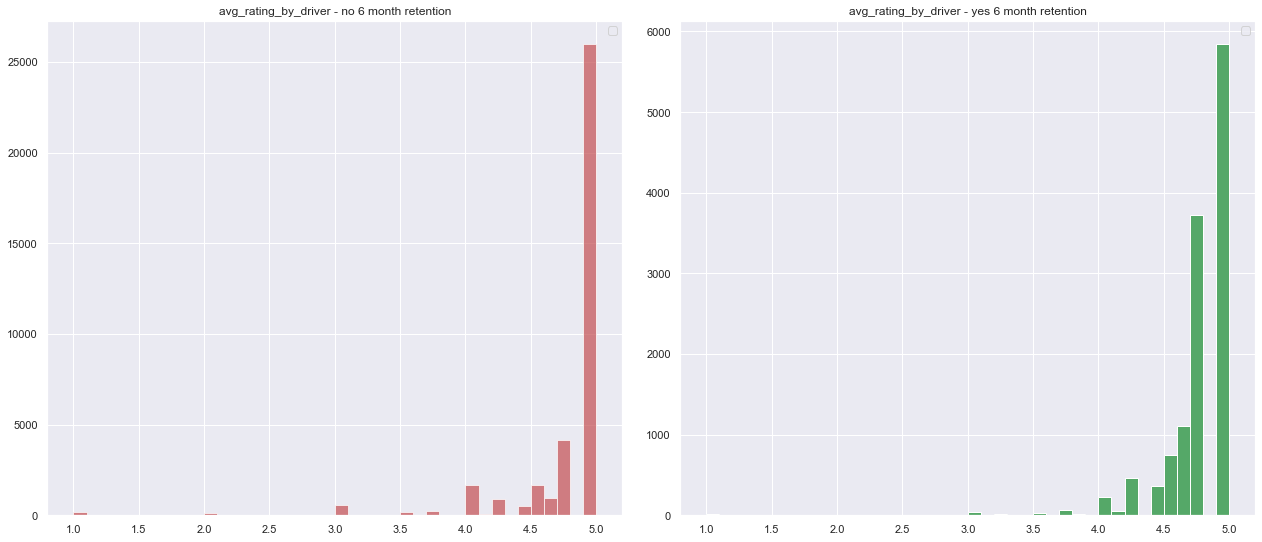

In [123]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["avg_rating_by_driver"], bins=40, alpha = 0.7, color = 'r')
#ax[0].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
ax[0].title.set_text('avg_rating_by_driver - no 6 month retention')
ax[1].title.set_text('avg_rating_by_driver - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["avg_rating_by_driver"], bins=40, alpha = 1, color = 'g')
#ax[1].axvline(x=150, c='b', ls='--', alpha=1, label=str(150))
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

### Many users that weren't retained had a rating of 5 by the driver

No handles with labels found to put in legend.
No handles with labels found to put in legend.


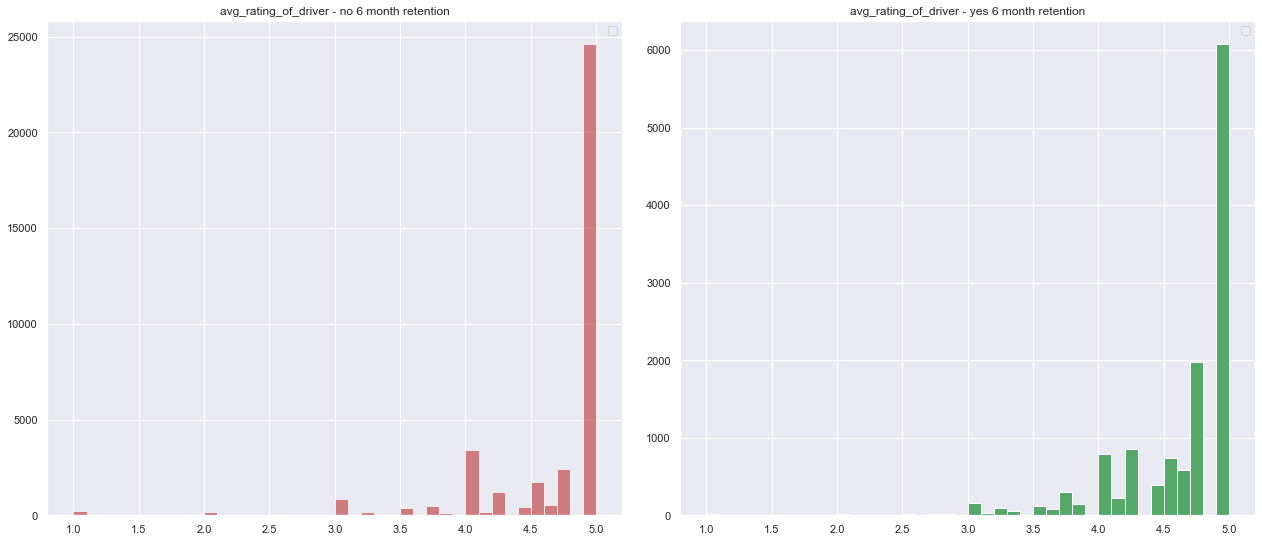

In [124]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["avg_rating_of_driver"], bins=40, alpha = 0.7, color = 'r')
ax[0].title.set_text('avg_rating_of_driver - no 6 month retention')
ax[1].title.set_text('avg_rating_of_driver - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["avg_rating_of_driver"], bins=40, alpha = 1, color = 'g')
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

### Similarly, Many users that weren't retained had a rating of 5 by the driver

No handles with labels found to put in legend.
No handles with labels found to put in legend.


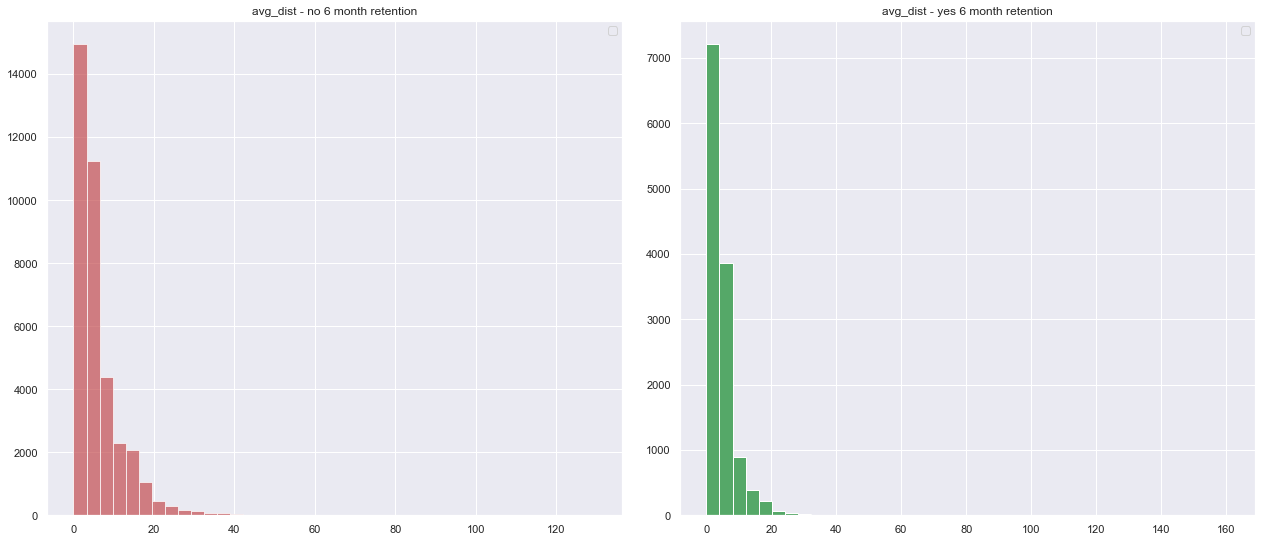

In [125]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["avg_dist"], bins=40, alpha = 0.7, color = 'r')
ax[0].title.set_text('avg_dist - no 6 month retention')
ax[1].title.set_text('avg_dist - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["avg_dist"], bins=40, alpha = 1, color = 'g')
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


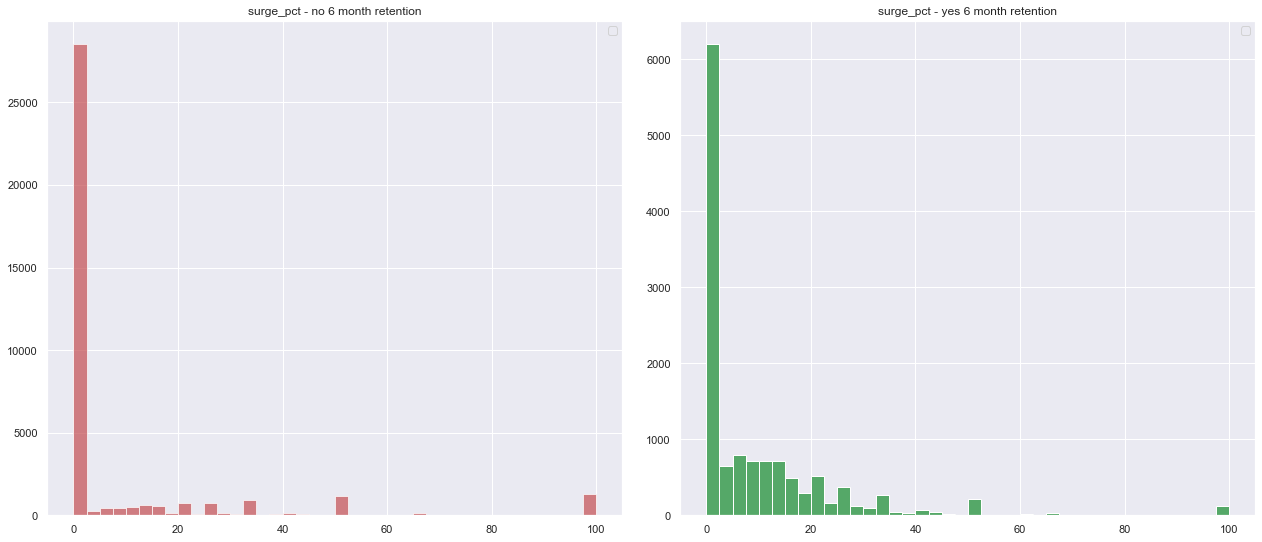

In [127]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["surge_pct"], bins=40, alpha = 0.7, color = 'r')
ax[0].title.set_text('surge_pct - no 6 month retention')
ax[1].title.set_text('surge_pct - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["surge_pct"], bins=40, alpha = 1, color = 'g')
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

#### surge_pct: the percent of trips taken with surge multiplier > 1

No handles with labels found to put in legend.
No handles with labels found to put in legend.


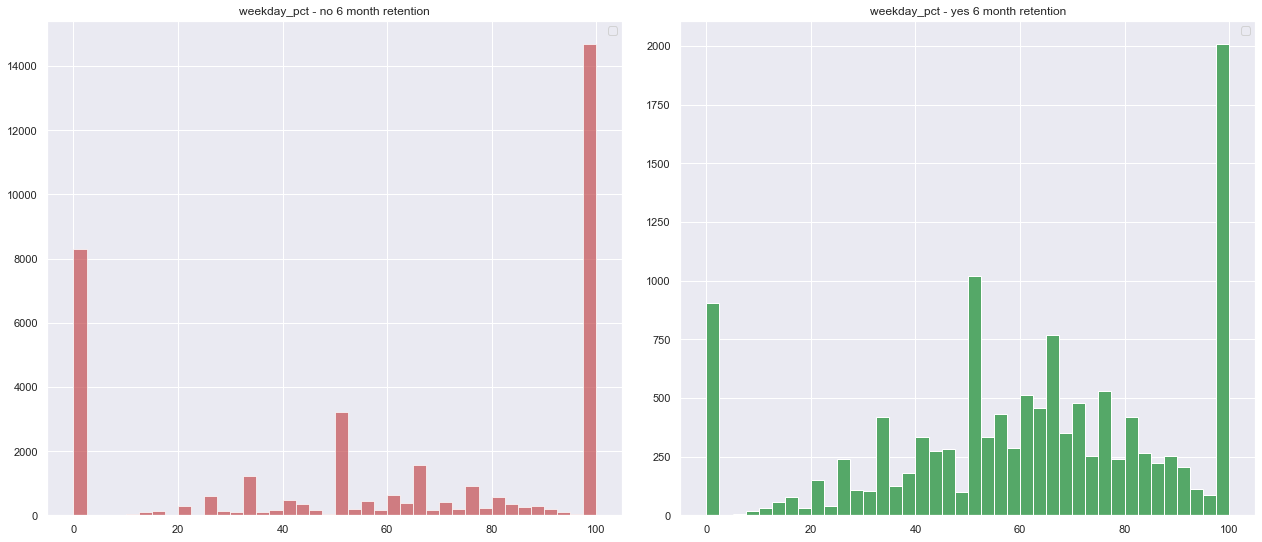

In [128]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 8, forward=True)

ax[0].hist(NO["weekday_pct"], bins=40, alpha = 0.7, color = 'r')
ax[0].title.set_text('weekday_pct - no 6 month retention')
ax[1].title.set_text('weekday_pct - yes 6 month retention')
ax[0].legend()


ax[1].hist(YES["weekday_pct"], bins=40, alpha = 1, color = 'g')
fig.tight_layout(pad=2.0)
ax[1].legend()
plt.show()

# Parameter boosting to improve model accuracy: max depth=8, n_estimators=100

### These boosting results were applied to the model once determined

# 

In [213]:
rfc= RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]}

In [215]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train_enc, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [216]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [217]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 100}


0.757 + or -0.014 for the {'max_depth': 2, 'n_estimators': 5}
0.757 + or -0.005 for the {'max_depth': 2, 'n_estimators': 10}
0.749 + or -0.003 for the {'max_depth': 2, 'n_estimators': 50}
0.749 + or -0.002 for the {'max_depth': 2, 'n_estimators': 100}
0.749 + or -0.002 for the {'max_depth': 2, 'n_estimators': 250}
0.781 + or -0.003 for the {'max_depth': 4, 'n_estimators': 5}
0.784 + or -0.002 for the {'max_depth': 4, 'n_estimators': 10}
0.787 + or -0.002 for the {'max_depth': 4, 'n_estimators': 50}
0.787 + or -0.003 for the {'max_depth': 4, 'n_estimators': 100}
0.788 + or -0.003 for the {'max_depth': 4, 'n_estimators': 250}
0.79 + or -0.002 for the {'max_depth': 8, 'n_estimators': 5}
0.793 + or -0.003 for the {'max_depth': 8, 'n_estimators': 10}
0.793 + or -0.002 for the {'max_depth': 8, 'n_estimators': 50}
0.794 + or -0.002 for the {'max_depth': 8, 'n_estimators': 100}
0.794 + or -0.002 for the {'max_depth': 8, 'n_estimators